In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import plotly.express as px
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

init_notebook_mode(connected=True)

In [254]:
df = pd.read_csv("attacks.csv", encoding = "ISO-8859-1")

In [ ]:
df.head()

In [256]:
df.shape

(25723, 24)

In [ ]:
df.isnull().sum()

In [258]:
df.drop(["Unnamed: 22", "Unnamed: 23"], axis=1, inplace=True)

In [ ]:
df.info()

In [260]:
df.drop(["Case Number", "Date", "Year", "Area", "Location", "Name", "Injury",
         "Investigator or Source", "pdf", "href formula", "href", 
         "Case Number.1", "Case Number.2", "Time", "original order"], axis=1, inplace=True)

In [ ]:
df.head()

In [262]:
df.isnull().sum()

Type           19425
Country        19471
Activity       19965
Sex            19986
Age            22252
Fatal (Y/N)    19960
Species        22259
dtype: int64

In [263]:
df.columns = ["Type", "Country", "Activity", "Sex", "Age", "Fatal", "Species"]

In [264]:
df = df.dropna(how="any")

In [267]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d', '', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [re.sub(r'(.)\1{1,}', r'\1\1', word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    
    text = " ".join(words)
    return text

In [268]:
df["Species"] = df["Species"].apply(preprocess_text)

In [272]:
df = df[df["Country"] == "USA"]

In [273]:
df["Species"] = df["Species"].apply(lambda text: text.replace("to", "").strip())

In [274]:
df["Species"] = df["Species"].apply(lambda text: text.replace("feet", "").strip())

In [275]:
df["Species"] = df["Species"].apply(lambda text: text.replace("less than", "").strip())

In [276]:
df["Species"] = df["Species"].apply(lambda text: text.replace("possibly", "").strip())

In [277]:
df["Species"] = df["Species"].apply(lambda text: text.replace("small", "").strip())

In [278]:
df["Species"] = df["Species"].apply(lambda text: text.replace("tall", "").strip())

In [279]:
df["Species"] = df["Species"].apply(lambda text: text.replace("brown", "").strip())
df["Species"] = df["Species"].apply(lambda text: text.replace("cm", "").strip())
df["Species"] = df["Species"].apply(lambda text: text.replace("greycolored", "").strip())

In [280]:
def or_split(text):
    if "or" in text:
        return text.split("or")[0].strip()
    else:
        return text

In [282]:
df["Species"] = df["Species"].apply(or_split)

In [283]:
def len_strip(text):
    if len(text.split()) > 2:
        words = text.split()[:2]
        text = " ".join(words)
        return text
    else:
        return text

In [285]:
df["Species"] = df["Species"].apply(len_strip)

In [286]:
df["Species"] = df["Species"].replace({
 'shark': 'unknown',
 'juvenile blacktip': 'blacktip shark',
 'blacktip': 'blacktip shark',
 'tp shark': 'unknown',
 'whitetip reef': 'reef shark',
 'thought involve': 'unknown',
 'shark  blactip': 'blacktip shark',
 'p': 'unknown',
 'shark involvement': 'unknown',
 '': 'unknown',
 'yearold pound': 'unknown',
 'shark tiger': 'tiger shark',
 'spinner': 'spinner shark',
 'grey reef': 'reef shark',
 'juvenile white': 'white shark',
 'unknown but': 'unknown',
 'unidentified species': 'unknown',
 '\x93  shark\x94': 'unknown',
 '\x93\x94 shark': 'unknown',
 'bite diameter': 'unknown',
 'species unidentified': 'unknown',
 'grey col': 'unknown',
 'hammerhead': 'hammerhead shark',
 'shark bull': 'bull shark',
 'shark oth': 'unknown',
 'questionable incident': 'unknown',
 'large white': 'white shark',
 'shark  blacktip': 'blacktip shark',
 'shark was': 'unknown',
 'shark probably': 'unknown',
 'sh': 'unknown',
 'shark seen': 'unknown',
 'shark spinner': 'spinner shark',
 'young shark': 'unknown',
 'unidentified shark': 'unknown',
 'said involve': 'unknown',
 'bull': 'bull shark',
 'lb shark': 'unknown',
 'sixgill': 'unknown',
 'hammerhead sharko': 'hammerhead shark',
 'bull sandbar': 'bull shark',
 'maculpinnis': 'unknown',
 'local auth': 'unknown',
 'hand found': 'unknown',
 'h': 'unknown',
 'larger shark': 'unknown',
 'rep': 'unknown',
 'leucas': 'unknown'
})

In [289]:
df.drop("Country", axis=1, inplace=True)

In [290]:
df["Activity"].value_counts().head(10)

Activity
Surfing            266
Swimming           100
Wading              49
Spearfishing        31
Fishing             25
Standing            22
Snorkeling          14
Body boarding       13
Boogie boarding     11
Scuba diving        10
Name: count, dtype: int64

In [291]:
def activity_split(text):
    if "/" in text:
        text = text.split("/")[0].strip()
        return text
    
    else:
        return text

In [292]:
df["Activity"] = df["Activity"].apply(activity_split)

In [293]:
def activity_finder(text):
    activities = ["Surfing", "Swimming", "Wading", "Spearfishing", "Standing", "Fishing", "Snorkeling", "Scuba diving", "boarding"]
    for i in range(len(activities)):
        if activities[i] in text:
            return activities[i]
        
    return "Other"

In [294]:
df["Activity"] = df["Activity"].apply(activity_finder)

In [295]:
df = df[["Type", "Activity", "Sex", "Age", "Species", "Fatal"]]

In [ ]:
df.head()

<AxesSubplot: xlabel='Type', ylabel='count'>

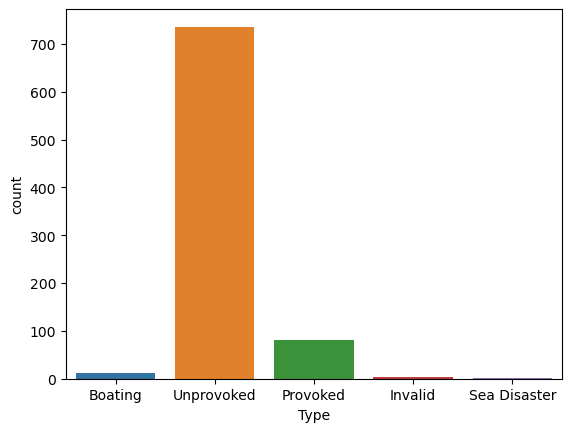

In [297]:
sns.countplot(x="Type", data=df)

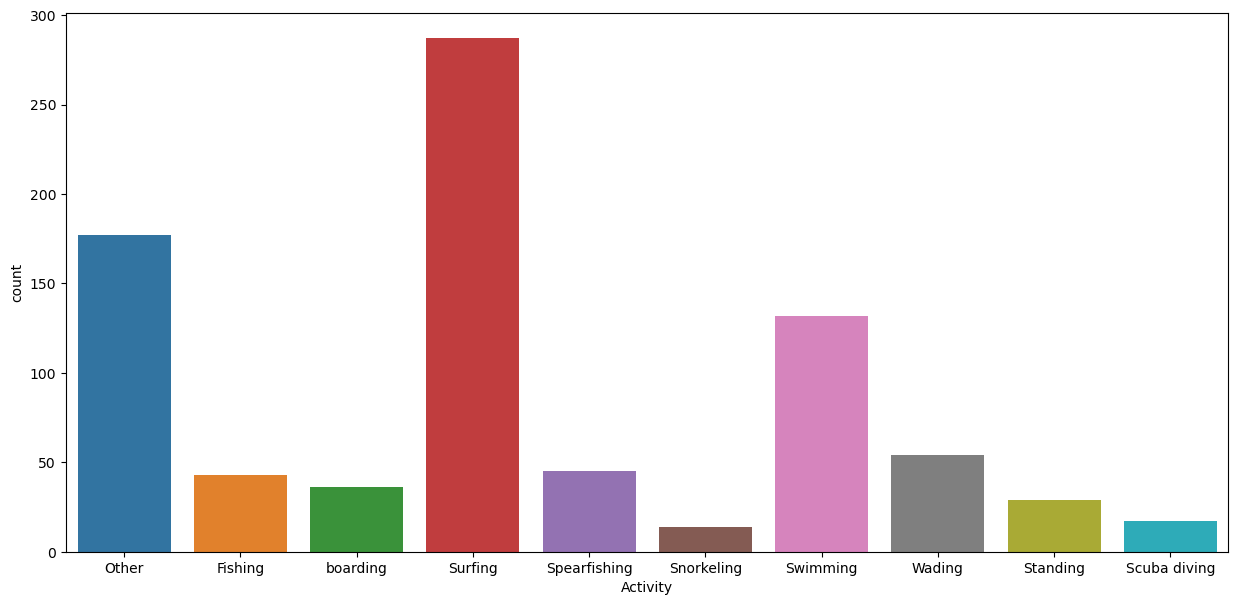

In [298]:
plt.figure(figsize=(15, 7))
sns.countplot(x="Activity", data=df)
plt.show()

In [299]:
df["Age"].unique()

array(['57', '52', '15', '29', '25', '54', '40', '18', '69', '13', '34',
       '50', '46', '14', '20', '28', '17', '58', '36', '60s', '51', '22',
       '21', '43', '61', '59', '42', '6', '19', '48', '23', '26', '71',
       '44', '27', '12', '10', '31', '38', '68', '9', '16', '11', '63',
       '70', '53', '7', '20s', 'Teen', '39', '37', '30', '45', '32', '60',
       '55', '8', '56', '33', '41', '49', '66', '24', '35', '30s', '47',
       '\xa0 ', '6½', '73', '5', '62', ' 28', "60's", 'adult', ' 43'],
      dtype=object)

In [302]:
df["Age"] = df["Age"].replace({
    "Teen": "18",
    "adult": "25",
    "\xa0 ": "23",
    "6½": "21",
    "30s": "30",
    "60s": "60",
    "60's": "60",
    "20s": "20"
})

In [303]:
df["Age"] = df["Age"].astype("int64")

In [304]:
df["Sex"].value_counts()

Sex
M      693
F      140
lli      1
Name: count, dtype: int64

In [305]:
df["Sex"] = df["Sex"].replace({
    "lli": "F"
})

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 6226
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      834 non-null    object
 1   Activity  834 non-null    object
 2   Sex       834 non-null    object
 3   Age       834 non-null    int64 
 4   Species   834 non-null    object
 5   Fatal     834 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.6+ KB


In [249]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [307]:
cols = ["Type", "Activity", "Sex", "Species", "Fatal"]
for col in cols:
    df[col] = label_encoder(df[col])

Type ['Boating' 'Invalid' 'Provoked' 'Sea Disaster' 'Unprovoked']
Activity ['Fishing' 'Other' 'Scuba diving' 'Snorkeling' 'Spearfishing' 'Standing'
 'Surfing' 'Swimming' 'Wading' 'boarding']
Sex ['F' 'M']
Species ['angel shark' 'blacktip reef' 'blacktip shark' 'blue shark'
 'bonita sharkk' 'bull shark' 'dogfish shark' 'foot shark'
 'galapagos shark' 'hammerhead shark' 'juvenile shark' 'juvenile tiger'
 'lb dog' 'lb reef' 'lb sand' 'lemon shark' 'mako shark' 'nurse shark'
 'reef shark' 'sand shark' 'sandbar shark' 'sandshark' 'sandtiger shark'
 'sevengill shark' 'shark species' 'shark with' 'sharks' 'spinner shark'
 'thresher' 'thresher shark' 'tiger shark' 'unidentified' 'unknown'
 'white shark']
Fatal ['N' 'Y']


In [308]:
X = df.drop("Fatal", axis=1)
y = df["Fatal"]

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [310]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [311]:
y_pred = rf.predict(X_test)

In [316]:
accuracy_score(y_test, y_pred)

0.9700598802395209

<AxesSubplot: >

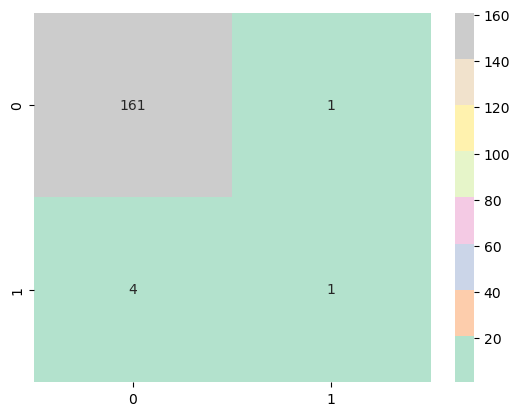

In [318]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Pastel2")

In [317]:
pickle.dump(rf, open("rf.pkl", "wb"))